## 1. Import Standard Libraries

In [1]:
from IPython import display

import matplotlib_inline.backend_inline

matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import torch
import torch.nn as nn
import torch.nn.functional  as F

## 2. Create the DL model

In [5]:
# create a class for the model
class thenet(nn.Module):
    
    def __init__(self):
        super().__init__()

        ### Input layer
        self.input = nn.Linear(100,80)

        ### Hidden layer
        self.fc1 = nn.Linear(80,100)
        self.fc2 = nn.Linear(100,120)
        self.fc3 = nn.Linear(120,100)

        ### Output layer
        self.output = nn.Linear(100,2)

    # Forward pass
    def forward(self,x):
        
        x = F.relu( self.input(x) )
        x = F.relu( self.fc1(x) )
        x = F.relu( self.fc2(x) )
        x = F.relu( self.fc3(x) )
        
        return self.output(x)

## 3. Explore the initialized weights

In [6]:
# create an instance of the model
net = thenet()
print(net)

thenet(
  (input): Linear(in_features=100, out_features=80, bias=True)
  (fc1): Linear(in_features=80, out_features=100, bias=True)
  (fc2): Linear(in_features=100, out_features=120, bias=True)
  (fc3): Linear(in_features=120, out_features=100, bias=True)
  (output): Linear(in_features=100, out_features=2, bias=True)
)


In [17]:
for p in net.named_parameters():
    
    print('----',p[0],'----')
    print(p[1].data)
    print('\n', '*'*50)
    
    

---- input.weight ----
tensor([[ 0.0897,  0.0832,  0.0903,  ..., -0.0758,  0.0052,  0.0234],
        [ 0.0621, -0.0957, -0.0705,  ..., -0.0174,  0.0929,  0.0831],
        [-0.0894, -0.0494,  0.0016,  ..., -0.0022, -0.0316,  0.0519],
        ...,
        [ 0.0675,  0.0494,  0.0916,  ..., -0.0621,  0.0036, -0.0272],
        [-0.0664, -0.0005,  0.0022,  ...,  0.0132,  0.0337,  0.0294],
        [ 0.0398,  0.0437, -0.0041,  ...,  0.0790, -0.0564, -0.0789]])

 **************************************************
---- input.bias ----
tensor([-0.0430,  0.0179, -0.0011, -0.0766,  0.0920, -0.0314,  0.0382,  0.0521,
         0.0740, -0.0213, -0.0986,  0.0848,  0.0382,  0.0048,  0.0635, -0.0074,
         0.0851,  0.0695, -0.0136, -0.0666, -0.0774, -0.0895, -0.0253, -0.0177,
         0.0610, -0.0967, -0.0664, -0.0522,  0.0106,  0.0059, -0.0802,  0.0034,
        -0.0115, -0.0749,  0.0409,  0.0111, -0.0097, -0.0639,  0.0231,  0.0520,
        -0.0406, -0.0961, -0.0296,  0.0768,  0.0493,  0.0002, -0.0839

In [20]:
# collect all weights and biases
allweights = np.array([])
allbiases =  np.array([])

for p in net.named_parameters():
    
    if 'bias' in p[0]:
        allbiases = np.concatenate( ( allbiases,p[1].data.numpy().flatten() ), axis=0 )
        
    elif 'weight' in p[0]:
        allweights = np.concatenate( ( allweights,p[1].data.numpy().flatten() ),axis=0 )
        
# How many are there?
print(f'There are {len(allbiases)} bias parameters.')
print(f'There are {len(allweights)} weight parameters.')

There are 402 bias parameters.
There are 40200 weight parameters.


#### conclusion :
- Thus , we have 40k weights and 400 biases
- Hence , initialization of bias is not so much important.

## 4. Visualization

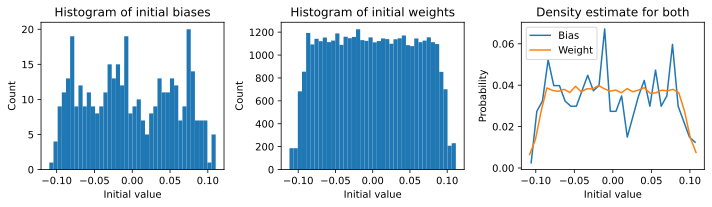

In [29]:
# show their histograms
fig,ax = plt.subplots(1,3,figsize=(10,3),  dpi=135)

# Histogram for Biases
ax[0].hist(allbiases,40)
ax[0].set_title('Histogram of initial biases')

# Histogram for weights
ax[1].hist(allweights,40)
ax[1].set_title('Histogram of initial weights')


# Collect histogram data to show as line plots
yB,xB = np.histogram(allbiases,30)
yW,xW = np.histogram(allweights,30)

ax[2].plot( ( xB[1:]+xB[:-1] )/2, yB/np.sum(yB), label='Bias')
ax[2].plot(( xW[1:]+xW[:-1] )/2, yW/np.sum(yW), label='Weight')

ax[2].set_title('Density estimate for both')
ax[2].legend()


# Plot adjustments common to all subplots
for i in range(3):
    ax[i].set_xlabel('Initial value')
    ax[i].set_ylabel('Count')
    
ax[2].set_ylabel('Probability')

fig.tight_layout()
plt.show()

## 5. Layer-specific distributions

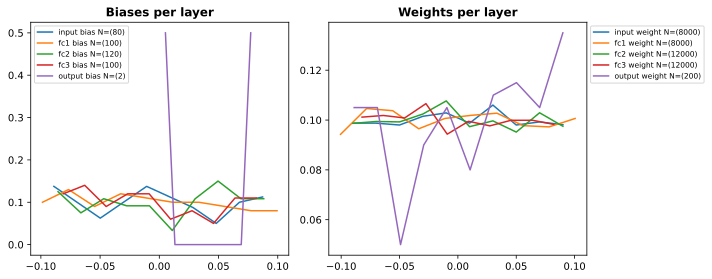

In [47]:
fig,ax = plt.subplots(1,2,figsize=(10,4), dpi=135)

for p in net.named_parameters():

    # Get the data and compute their histogram
    thesedata = p[1].data.numpy().flatten()
    y,x = np.histogram(thesedata,10)

    # For the bias
    if 'bias' in p[0]:
        ax[0].plot( ( x[1:]+x[:-1] )/2, y/np.sum(y), 
                   label=f"{p[0][:-5]} bias N=({len(thesedata)})")
                    
            
    # for the weights
    elif 'weight' in p[0]:
        ax[1].plot( ( x[1:]+x[:-1] )/2, y/np.sum(y),
                   label= f"{p[0][:-7]} weight N=({len(thesedata)})") 
        

ax[0].set_title('Biases per layer', fontweight="bold")
ax[0].legend(fontsize=7.5)

ax[1].set_title('Weights per layer', fontweight="bold")
ax[1].legend(bbox_to_anchor=(1,1),loc='upper left',fontsize=7.5)

fig.tight_layout()

plt.show()

In [48]:
# What's up with the weird output bias distribution??
print( net.output.bias.data )
# only two datapoints

tensor([0.0812, 0.0012])


In [49]:
torch.min(net.fc1.bias.data)

tensor(-0.1097)

In [51]:
torch.min(net.fc1.bias.data).item()

-0.10966386646032333

In [52]:
torch.max(net.fc1.bias.data)

tensor(0.1104)

In [50]:
torch.max(net.fc1.bias.data).item()

0.1104179322719574

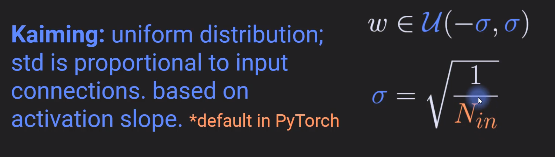

In [55]:
# Let's test whether the numbers match our prediction from the formula

# empirical bias range
biasrange = np.round([ torch.min(net.fc1.bias.data).item(), torch.max(net.fc1.bias.data).item() ],4)
# calculating number of input features
biascount = len(net.fc1.bias.data)

# theoretical expected value
sigma = np.sqrt(1/biascount)

# drum rolllllll.....
print('Theoretical sigma = ' + str(sigma))
print('Empirical range = ' + str(biasrange))

Theoretical sigma = 0.1
Empirical range = [-0.1097  0.1104]


## 6. Now to initialize the weights using the Xavier method

In [57]:
# create a new instance of the model
net_xavier = thenet()

# change the weights (leave biases as Kaiming [default])
for p in net_xavier.named_parameters():
    
    if 'weight' in p[0]:
        # inplace change will occur in weight matrix
        nn.init.xavier_normal_(p[1].data)

## 7. Visualization

In [58]:
# Collect all weights and biases

allweights = np.array([])
allbiases =  np.array([])

for p in net_xavier.named_parameters():
    
    if 'bias' in p[0]:
        allbiases = np.concatenate( ( allbiases,p[1].data.numpy().flatten() ), axis=0 )
        
    elif 'weight' in p[0]:
        allweights = np.concatenate( ( allweights,p[1].data.numpy().flatten() ),axis=0 )
        
# How many are there?
print(f'There are {len(allbiases)} bias parameters.')
print(f'There are {len(allweights)} weight parameters.')

There are 402 bias parameters.
There are 40200 weight parameters.


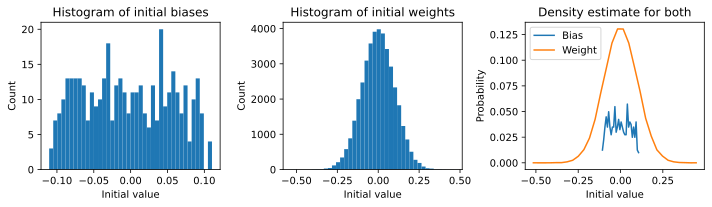

In [59]:
# show their histograms
fig,ax = plt.subplots(1,3,figsize=(10,3),  dpi=135)

# Histogram for Biases
ax[0].hist(allbiases,40)
ax[0].set_title('Histogram of initial biases')

# Histogram for weights
ax[1].hist(allweights,40)
ax[1].set_title('Histogram of initial weights')


# Collect histogram data to show as line plots
yB,xB = np.histogram(allbiases,30)
yW,xW = np.histogram(allweights,30)

ax[2].plot( ( xB[1:]+xB[:-1] )/2, yB/np.sum(yB), label='Bias')
ax[2].plot(( xW[1:]+xW[:-1] )/2, yW/np.sum(yW), label='Weight')

ax[2].set_title('Density estimate for both')
ax[2].legend()


# Plot adjustments common to all subplots
for i in range(3):
    ax[i].set_xlabel('Initial value')
    ax[i].set_ylabel('Count')
    
ax[2].set_ylabel('Probability')

fig.tight_layout()
plt.show()

# Normal distribution for weights - Xavier method

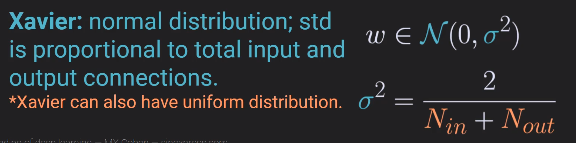

In [68]:
# Let's test whether the numbers match our prediction from the formula

# empirical weight standard deviation
weightvar   = np.round(torch.var(net_xavier.fc1.weight.data.flatten()).item(), 3)
weightsize = net_xavier.fc1.weight.data.shape

# Theoretical Expected value
# number of input features for fc1 layer (Nin)   = weightsize[0]
# number of output features for fc1 layer (Nout) = weightsize[0]

sigma2 = np.round(2 / ( weightsize[0] + weightsize[1] ),3)

# drum rolllllll.....
print('Theoretical sigma = ' + str(sigma2))
print('Empirical variance = ' + str(weightvar))

Theoretical sigma = 0.011
Empirical variance = 0.011
